# **Support Vector Boundary**




Download the [NYC Building Energy Efficiency](https://www.kaggle.com/datasets/alistairking/nyc-building-energy-efficiency-ratings/data?select=geojson_lookup_rows.csv) dataset [here](https://drive.google.com/file/d/1eSTMHM_l74_AfEPl9xcZtHJxHOwSxP0l/view?usp=sharing) \
```SVC``` documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
merged_data = pd.read_csv('/content/energy_ny_buildings_curated.csv')

# Split the data into features (X) and target (y)
X = merged_data[['DOF_Gross_Square_Footage_x', 'Energy_Star_1-100_Score_x']]
y = merged_data['Energy_Efficiency_Grade_x']

In [ ]:
sns.pairplot(merged_data, hue='Energy_Efficiency_Grade_x', corner=True)

<Axes: xlabel='DOF_Gross_Square_Footage_x', ylabel='Energy_Star_1-100_Score_x'>

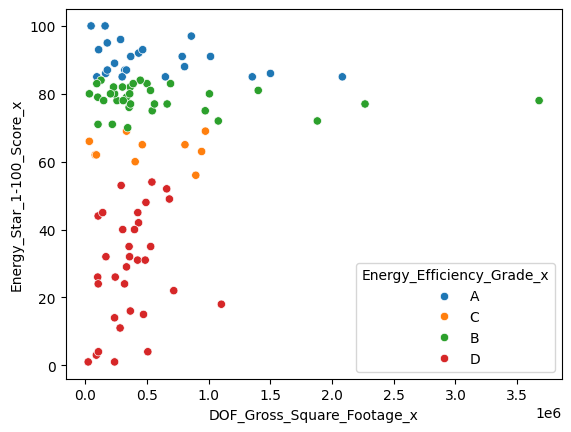

In [ ]:
sns.scatterplot(data = merged_data, x = 'DOF_Gross_Square_Footage_x', y='Energy_Star_1-100_Score_x', hue = 'Energy_Efficiency_Grade_x')

In [7]:
# Instance SVM object
svm = SVC(kernel = "rbf")

# Training
svm.fit( X , y ) # (num_samples, num_features), (num_samples)

SVC()

In [8]:
# Model Evaluation
y_pred = svm.predict(X)

# Print Classification Report
print("Classification Report:")
print(classification_report(y, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        23
           B       0.37      0.21      0.26        34
           C       0.00      0.00      0.00        10
           D       0.40      0.97      0.56        33

    accuracy                           0.39       100
   macro avg       0.19      0.29      0.21       100
weighted avg       0.26      0.39      0.28       100

Confusion Matrix:
[[ 0  7  0 16]
 [ 0  7  0 27]
 [ 0  4  0  6]
 [ 0  1  0 32]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Valores minimos y maximos para crear el grid de las fronteras de decision
h_min, h_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
v_min, v_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()

# Crear el grid de las fronteras de decision
h_grid,v_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(v_min, v_max, 100))

# Predecir los valores del grid
pred_grid= svm.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
print (pred_grid.shape)
# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape(h_grid.shape)
print (pred_grid.shape)

(10000,)
(100, 100)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
# Example: mapping categories to numbers
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
pred_grid = np.vectorize(label_mapping.get)(pred_grid)

[]

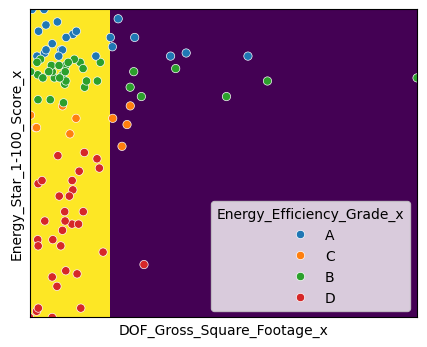

In [34]:
# Dibujar el grid y las fronteras de decision
_, ax = plt.subplots (figsize=(5,4))

# ax.pcolormesh(h_grid, v_grid, pred_grid, cmap = 'Paired')
ax.pcolormesh(h_grid, v_grid, pred_grid, shading='auto')

# Imprimir las muestras con el scatter
sns.scatterplot(data = merged_data, x = 'DOF_Gross_Square_Footage_x', y='Energy_Star_1-100_Score_x', hue = 'Energy_Efficiency_Grade_x', ax = ax)

ax.set_xlim(h_grid.min(), h_grid.max())
ax.set_ylim(v_grid.min(), v_grid.max())

ax.set_xticks(())
ax.set_yticks(())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


## In real data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

In [ ]:
# import some data to play with
iris = _
X = _   # Pick 2 features
Y = _

In [ ]:
# Create an instance of SVM and fit the data.
clf = _
clf.fit( _ , _ )

In [ ]:
# Plot decision boundaries
_